# Fractional Brownian Motion Parameter Estimation Using Periodogram Method

The periodigram method uses the fractional brownian noise power spectrum to estimate the Hurst,</br>
denoted by $H$. The power spectrum is the Fourier transform of the fractional brownian motion noise autocorrelation</br>
function. This relationship is called the Weiner-Khichnin theorem.</br>

Let $Z^H(t)$ denote a fractional path then fractional brownian noise is defined by,

$
\begin{align}
\Delta Z_k^H = Z^H(t_k) - Z^H(t_{k-1})
\end{align}
$

where $t_k = k \Delta t$. It follows that,

$
\begin{align}
Z^H(n\Delta t) = \sum_{i=1}^n \Delta Z_k^H
\end{align}
$

The autocovariance of fractional brownian noise is given by,

$
\begin{align}
\gamma^H_n = \text{Cov}[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Since $\text{Var}(\Delta Z_k^H) = \Delta t^{2H}$ the autocorrelation coefficient is defined by,</br>

$
\begin{align}
\rho^H_n = \frac{\gamma^H_n}{\Delta t^{2H}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

From the Weiner-Khichnin theorem the power spectrum is given by,</br>

$
\begin{align}
\hat{\rho}^H_\omega = \frac{1}{2} \int_{-\infty}^{\infty} \rho^H_n e^{-i \omega n} dn
\end{align}
$

It can be shown that fir $\omega \ggg 1$,

$
\begin{align}
\hat{\rho}^H_\omega \approx C\lvert \omega \rvert^{1 - 2H}
\end{align}
$

where $C$ is independent of $\omega$. It follows that $H$ can be determined by using OLS on $\hat{\rho}^H_\omega$ as a</br>
function of $\omega$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType, EstType)
from lib import (curve, single_var, perform_est)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
npts = 2**10

## Power Spectrum Simulation H=0.8

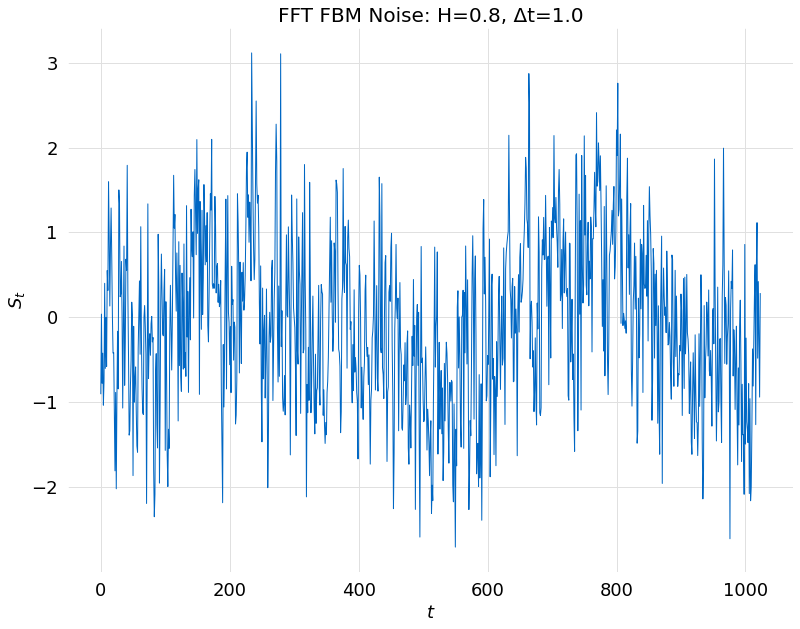

In [3]:
H = 0.8
fbm = DataSource.create_source_type(SourceType.FBM_NOISE_FFT, H=H, npts=npts)
curve(fbm, lw=1)

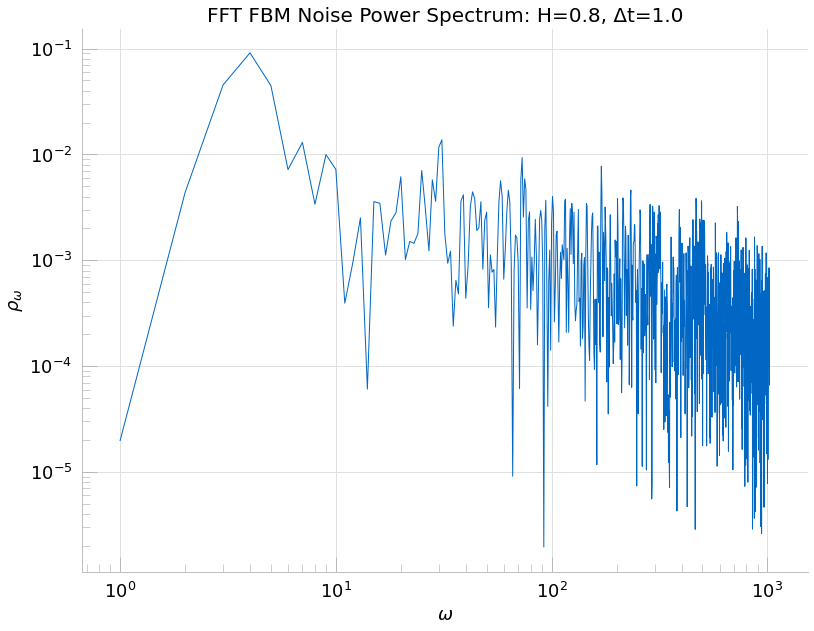

In [4]:
ps = DataFunc.apply_func_type(fbm, DataType.PSPEC)
curve(ps, lw=1, plot_type=PlotType.LOG)

In [5]:
results = perform_est(ps, EstType.PERGRAM)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Power Spectrum   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     258.7
Date:                Mon, 30 May 2022   Prob (F-statistic):           4.63e-52
Time:                        11:31:35   Log-Likelihood:                -886.58
No. Observations:                1023   AIC:                             1777.
Df Residuals:                    1021   BIC:                             1787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7206      0.110    -15.642      0.000      -1.936      -1.505
Frequency     -0.6772      0.042    -16.085      0.000      -0.760      -0.595
==============================================================================
Omnibus:                      157.505   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.776
Skew:                          -0.973   Prob(JB):                     2.62e-59
Kurtosis:                       4.594   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
ps.attrs

{'S(t)': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'Date': '30/05/2022 11:31:35',
 'Name': 'FFT-FBM-Noise-Simulation-bfd01d13-747c-4b1d-b860-876d58697865',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Schema': DataSchema(xcol=(Frequency), ycol=(Power Spectrum), data_type=(DataType.PSPEC)),
 'SchemaIterations': None,
 'Power Spectrum': {'npts': 1024,
  'DataType': <DataType.PSPEC: 'PSPEC'>,
  'Parameters': {},
  'Description': 'Power Spectrum',
  'ylabel': '$\\rho_\\omega$',
  'xlabel': '$\\omega$',
  'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'PERGRAM': {'Type': <EstType.PERGRAM: 'PERGRAM'>,
    'Regression Type': <RegType.LOG: 2>,
    'Constant': 

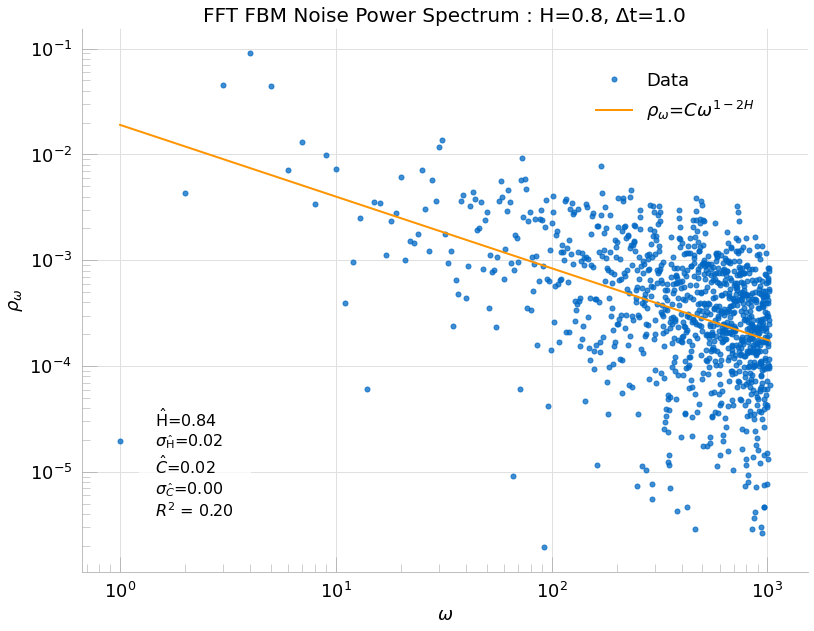

In [9]:
single_var(ps, est_type=EstType.PERGRAM)

## Power Spectrum Simulation H=0.3

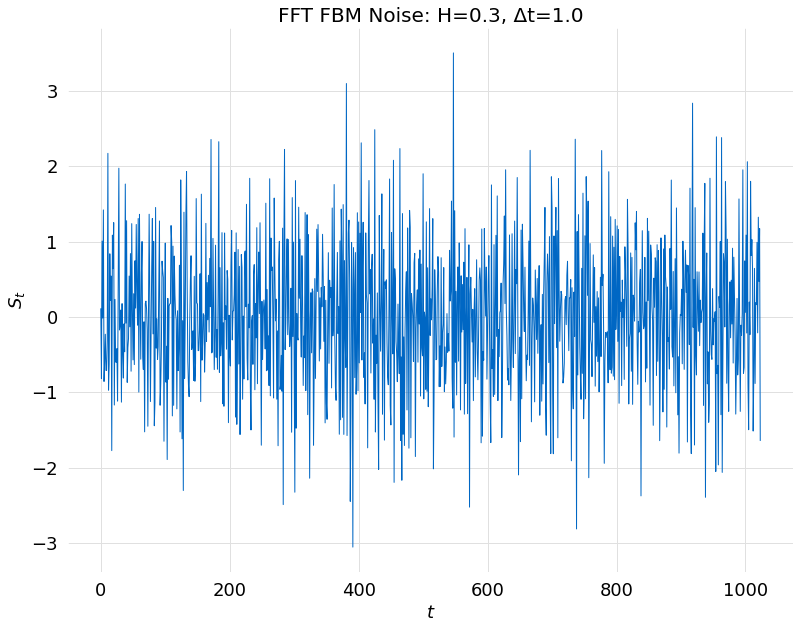

In [10]:
H = 0.3
fbm = DataSource.create_source_type(SourceType.FBM_NOISE_FFT, H=H, npts=npts)
curve(fbm, lw=1)

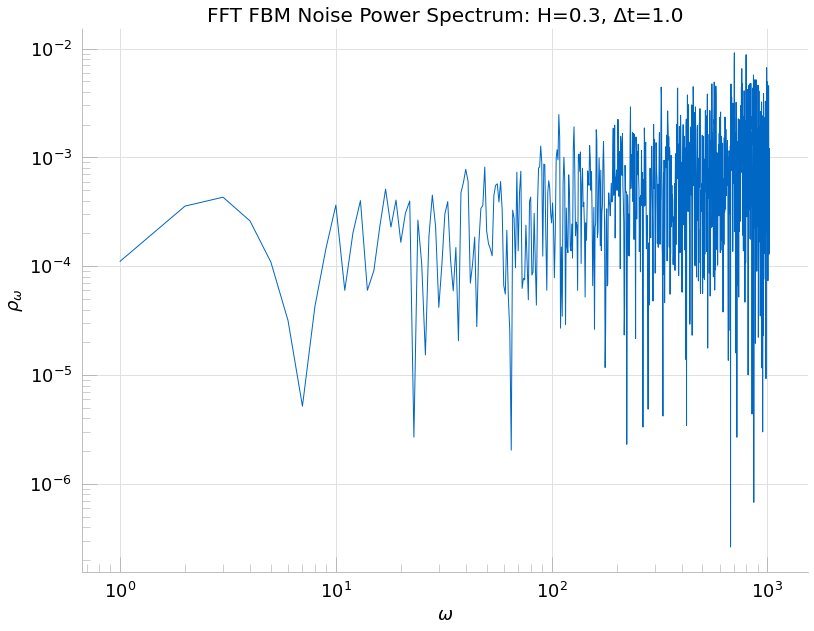

In [11]:
ps = DataFunc.apply_func_type(fbm, DataType.PSPEC)
curve(ps, lw=1, plot_type=PlotType.LOG)

In [12]:
results = perform_est(ps, EstType.PERGRAM)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Power Spectrum   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.39e-25
Time:                        11:36:53   Log-Likelihood:                -852.99
No. Observations:                1023   AIC:                             1710.
Df Residuals:                    1021   BIC:                             1720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4208      0.106    -41.530      0.000      -4.630      -4.212
Frequency      0.4377      0.041     10.744      0.000       0.358       0.518
==============================================================================
Omnibus:                      284.568   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.310
Skew:                          -1.363   Prob(JB):                    7.74e-194
Kurtosis:                       6.666   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
ps.attrs

{'S(t)': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.3, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'Date': '30/05/2022 11:36:48',
 'Name': 'FFT-FBM-Noise-Simulation-9f4ee2d1-c559-427e-86af-8c130e1abfa5',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Schema': DataSchema(xcol=(Frequency), ycol=(Power Spectrum), data_type=(DataType.PSPEC)),
 'SchemaIterations': None,
 'Power Spectrum': {'npts': 1024,
  'DataType': <DataType.PSPEC: 'PSPEC'>,
  'Parameters': {},
  'Description': 'Power Spectrum',
  'ylabel': '$\\rho_\\omega$',
  'xlabel': '$\\omega$',
  'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'PERGRAM': {'Type': <EstType.PERGRAM: 'PERGRAM'>,
    'Regression Type': <RegType.LOG: 2>,
    'Constant': 

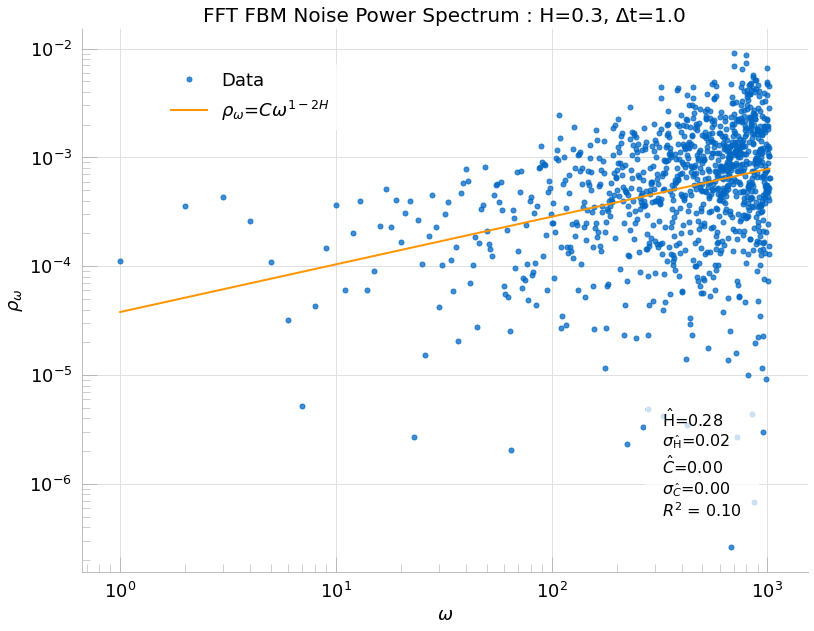

In [14]:
single_var(ps, est_type=EstType.PERGRAM)